In [29]:
import numpy as np
import sympy as sym
import matplotlib.pyplot as plt
from sympy import *

In [2]:
def first_order_univariate_derivative_FD(f,x,method='central',h=0.01):
  if method == 'central':
      return (f(x + h) - f(x - h))/(2*h)
  elif method == 'forward':
      return (f(x + h) - f(x))/h
  elif method == 'backward':
      return (f(x) - f(x - h))/h
  else:
      raise ValueError("Method must be 'central', 'forward' or 'backward'.")

In [4]:
first_order_univariate_derivative_FD(np.exp,0,method='central',h=0.01)

1.0000166667499921

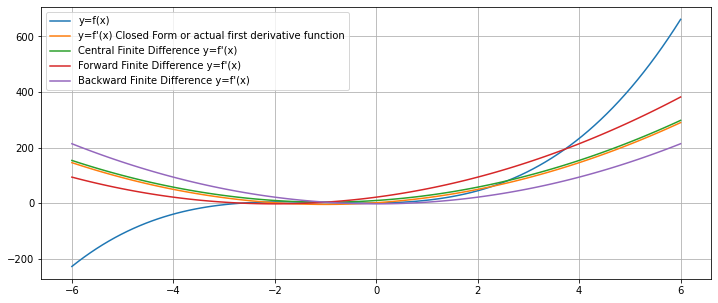

In [6]:
x = np.linspace(-6,6,100)

f = lambda x: (2*x**3 + 6*x**2+2*x + 1)
f_prime = lambda x: (6*x**2 + 12*x+2) #Closed Form or actual first derivative function
y = f(x)
y_prime = f_prime(x) 
shock_size=2

plt.figure(figsize=(12,5))
plt.plot(x,y,label='y=f(x)')
plt.plot(x,y_prime,label="y=f'(x) Closed Form or actual first derivative function")
#First derivative using central finite difference approximation
plt.plot(x,first_order_univariate_derivative_FD(f,x,method='central',h=shock_size),label="Central Finite Difference y=f'(x)")
#First derivative using forward finite difference approximation
plt.plot(x,first_order_univariate_derivative_FD(f,x,method='forward',h=shock_size),label="Forward Finite Difference y=f'(x)")
#First derivative using backward finite difference approximation
plt.plot(x,first_order_univariate_derivative_FD(f,x,method='backward',h=shock_size),label="Backward Finite Difference y=f'(x)")

plt.legend()
plt.grid(True)

plt.show()

[ 20  50  92 146 212]


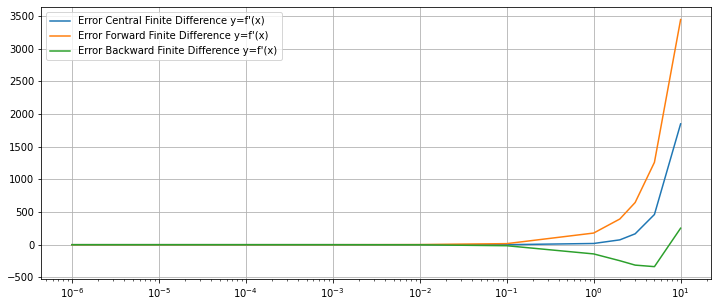

In [8]:
x = np.array([1,2,3,4,5])
f = lambda x: (2*x**3 + 6*x**2+2*x + 1)
f_prime = lambda x: (6*x**2 + 12*x+2) #Closed Form or actual first derivative function
y = f(x)
y_prime = f_prime(x) 
#shock_size=np.linspace(-0.1,0.1,100)
shock_size=[0.000001, 0.00001, 0.0001, 0.001, 0.01, 0.1, 1, 2, 3, 5, 10]

print(y_prime)

error_central_shock_FD=[]
error_forward_shock_FD=[]
error_backward_shock_FD=[]
for shock in shock_size:

  central_shock_FD = first_order_univariate_derivative_FD(f,x,method='central',h=shock)
  error=[(y/x-1)*100 for x, y in zip(y_prime, central_shock_FD)]
  error_central_shock_FD.append(np.sum(error))  

  forward_shock_FD = first_order_univariate_derivative_FD(f,x,method='forward',h=shock)
  error=[(y/x-1)*100 for x, y in zip(y_prime, forward_shock_FD)]
  error_forward_shock_FD.append(np.sum(error)) 

  backward_shock_FD = first_order_univariate_derivative_FD(f,x,method='backward',h=shock)
  error=[(y/x-1)*100 for x, y in zip(y_prime, backward_shock_FD)]
  error_backward_shock_FD.append(np.sum(error)) 


plt.figure(figsize=(12,5))

#First derivative using central finite difference approximation
plt.plot(shock_size,(error_central_shock_FD),label="Error Central Finite Difference y=f'(x)")
#First derivative using forward finite difference approximation
plt.plot(shock_size,(error_forward_shock_FD),label="Error Forward Finite Difference y=f'(x)")
#First derivative using backward finite difference approximation
plt.plot(shock_size,(error_backward_shock_FD),label="Error Backward Finite Difference y=f'(x)")

plt.legend()
plt.xscale('log')
plt.grid(True)

plt.show()

In [7]:
def second_order_univariate_derivative_FD(f,x,method='central',h=0.01):
  return (f(x + h) + f(x - h) - 2*f(x) )/(h*h)

Derivatives in Python without Finite Difference Method

In [40]:
def first_order_univariate_derivative_sympy(f,a):
  x = Symbol('x')
  # returns function, its first derivative and value of first derivative given an input value for x
  print(f, f.diff(x))
  return lambdify(x, f.diff(x), "numpy")(a)

In [35]:
def second_order_univariate_derivative_sympy(f,a):
  x = Symbol('x')
  # returns function, its second derivative and value of first derivative given an input value for x
  return f, f.diff(x,x), lambdify(x, f.diff(x,x))(a)

In [36]:
x = Symbol('x')
first_order_univariate_derivative_sympy(f=x**3,a=2) #Power rule  : f'(x^n) = n*x^(n-1)

(x**3, 3*x**2, 12)

In [37]:
x = Symbol('x')
first_order_univariate_derivative_sympy(f=sym.exp(x)*sym.cos(x),a=2) #Product rule : (uv)′ = u′v + uv′

(exp(x)*cos(x), -exp(x)*sin(x) + exp(x)*cos(x), -9.79378201806761)

In [87]:
first_order_univariate_derivative_sympy(f=sym.cos(x**2),a=2) #Chain rule : If h(x) = f(g(x)) , then h′(x) = f ′(g(x)) g′(x)

(cos(x**2), -2*x*sin(x**2), 3.027209981231713)

2*x**3 + 6*x**2 + 2*x + 1 6*x**2 + 12*x + 2


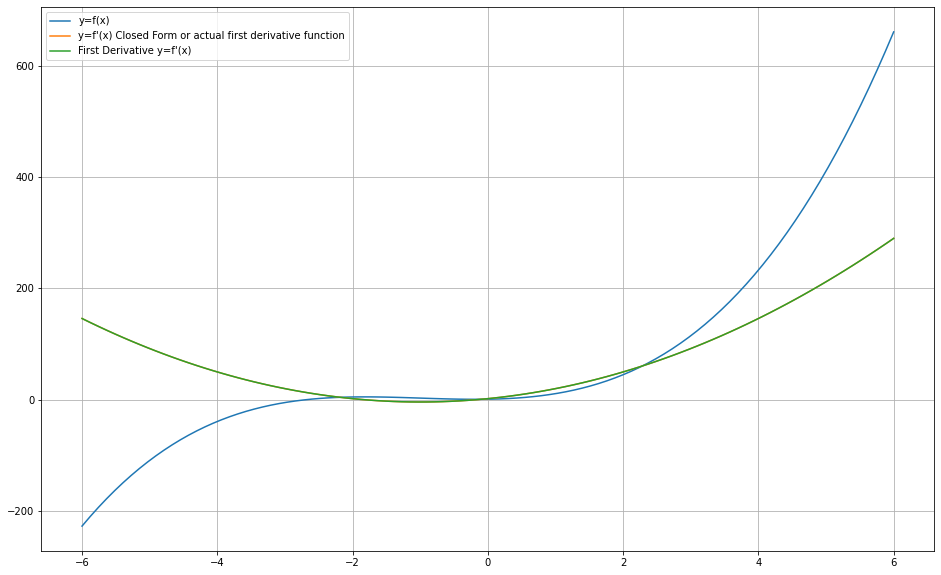

In [56]:
a = np.linspace(-6,6,100)
x = Symbol('x')
f = (2*x**3 + 6*x**2+2*x + 1)
fun = lambda x: (2*x**3 + 6*x**2+2*x + 1)
y=fun(a)
f_prime = lambda x: (6*x**2 + 12*x+2) #Closed Form or actual first derivative function
y_prime = f_prime(a) 

plt.figure(figsize=(16,10))
plt.plot(a,y,label='y=f(x)')
plt.plot(a,y_prime,label="y=f'(x) Closed Form or actual first derivative function")
#First derivative
plt.plot(a,first_order_univariate_derivative_sympy(f,a),label="First Derivative y=f'(x)")
#plt.plot(a,first_order_univariate_derivative_FD(fun,a,method='central',h=2.0),label="Central Finite Difference y=f'(x)")


plt.legend()
plt.grid(True)

plt.show()